In [0]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
NUM_CLASSES = 10

## Load data

In [0]:
def load_data(num_classes):
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0
  y_train = to_categorical(y_train, NUM_CLASSES)
  y_test = to_categorical(y_test, NUM_CLASSES)
  
  return x_train, x_test , y_train, y_test

In [0]:
x_train, x_test , y_train, y_test = load_data(NUM_CLASSES)

170500096/170498071 [==============================] - 6s 0us/step


## Model Definition

In [0]:
def build_dense_model():
  
  input_layer = Input(shape=(32, 32, 3))
  x = Flatten()(input_layer)
  x = Dense(units=200, activation='relu')(x)
  x = Dense(units=150, activation='relu')(x)
  output_layer = Dense(units=10, activation='softmax')(x)
  
  return Model(input_layer, output_layer)

In [0]:
def build_cnn_model():
  input_layer = Input((32,32,3))

  x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)


  x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)


  x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)


  x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)


  x = Flatten()(x)

  x = Dense(128)(x)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)
  x = Dropout(rate = 0.5)(x)

  x = Dense(NUM_CLASSES)(x)
  output_layer = Activation('softmax')(x)

  return Model(input_layer, output_layer)

In [0]:
model = build_dense_model()

W0810 12:41:08.503883 140121006331776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 12:41:08.549990 140121006331776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 12:41:08.577651 140121006331776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

W0810 12:41:14.032330 140121006331776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 12:41:14.044085 140121006331776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Train dense model

In [0]:
# train dense model
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

W0810 12:41:15.016074 140121006331776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0810 12:41:15.087560 140121006331776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
50000/50000 [==============================] - 13s 268us/step - loss: 1.8515 - acc: 0.3321
Epoch 2/10
50000/50000 [==============================] - 10s 197us/step - loss: 1.6703 - acc: 0.4028
Epoch 3/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.5915 - acc: 0.4325
Epoch 4/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.5374 - acc: 0.4531
Epoch 5/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.4980 - acc: 0.4675
Epoch 6/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.4693 - acc: 0.4783
Epoch 7/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.4430 - acc: 0.4887
Epoch 8/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.4146 - acc: 0.4975
Epoch 9/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.3998 - acc: 0.5030
Epoch 10/10
50000/50000 [==============================] - 10s 192us/step - loss: 

In [0]:
#evaluate
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 73us/step


[1.4525331756591797, 0.4873]

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_class = CLASSES[np.argmax(preds, axis=-1)]
actual_class = CLASSES[np.argmax(y_test, axis=-1)]

In [0]:
def debug_plot(preds_class, actual_class, n_to_show=10):
  indices = np.random.choice(x_test.shape[0], n_to_show)

  fig = plt.figure(figsize=(15, 3))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred='+str(preds_class[idx]), fontsize=10, ha='center', 
            transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act='+str(actual_class[idx]), fontsize=10, ha='center', 
            transform=ax.transAxes)
    ax.imshow(img)
  plt.show()

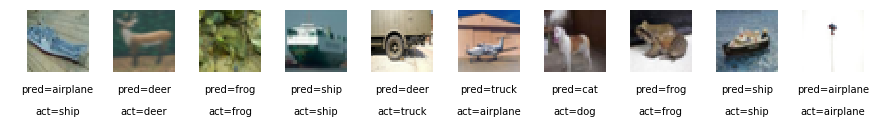

In [0]:
debug_plot(preds_class, actual_class)

## Train CNN model

In [0]:
model = build_cnn_model()

W0810 12:48:36.313587 140121006331776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0810 12:48:36.832376 140121006331776 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#compile
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
# train dense model
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 34s 686us/step - loss: 1.5525 - acc: 0.4560
Epoch 2/10
50000/50000 [==============================] - 31s 621us/step - loss: 1.1545 - acc: 0.5921
Epoch 3/10
50000/50000 [==============================] - 31s 615us/step - loss: 1.0095 - acc: 0.6468
Epoch 4/10
50000/50000 [==============================] - 31s 614us/step - loss: 0.9200 - acc: 0.6789
Epoch 5/10
50000/50000 [==============================] - 31s 612us/step - loss: 0.8568 - acc: 0.6996
Epoch 6/10
50000/50000 [==============================] - 31s 618us/step - loss: 0.8035 - acc: 0.7217
Epoch 7/10
50000/50000 [==============================] - 31s 611us/step - loss: 0.7613 - acc: 0.7348
Epoch 8/10
50000/50000 [==============================] - 30s 609us/step - loss: 0.7198 - acc: 0.7482
Epoch 9/10
50000/50000 [==============================] - 31s 611us/step - loss: 0.6813 - acc: 0.7624
Epoch 10/10
50000/50000 [==============================] - 31s 614us/step - loss: 

In [0]:
#evaluate
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 201us/step


[0.8042568470001221, 0.7206]

In [0]:
preds = model.predict(x_test)
preds_class = CLASSES[np.argmax(preds, axis=-1)]
actual_class = CLASSES[np.argmax(y_test, axis=-1)]

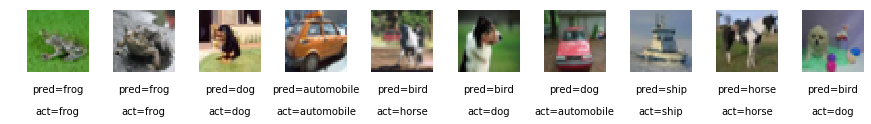

In [0]:
debug_plot(preds_class, actual_class)